# Update Facharztmangel im ÖGD

Haben die Entwicklungen rund um die Coronapandemie die Anzahl an Fachärzten für öffentliches Gesundheitswesen erhöht?

Jakob Schumacher [](https://orcid.org/0000-0002-9894-6085) ([Robert Koch-Institut](https://rki.de))  
Peter Tinnemann [](https://orcid.org/0000-0003-3071-9772) ([Gesundheitsamt Frankfurt](https://frankfurt.de/service-und-rathaus/verwaltung/aemter-und-institutionen/gesundheitsamt))  
16. Juni 2025

# Einleitung

Die Studie von Tinnemann et al. (2021) analysiert die Entwicklung des Anzahl an Fachärztinnen und Fachärzten für Öffentliches Gesundheitswesen (ÖGW) in Deutschland. Dabei wurde festgestellt, dass die Gesamtzahl der Fachärzte in Deutschland um 52 % gestiegen ist. Die Anzahl der Fachärzte für ÖGW ist um fast 30 % zurückgegangen. Die Untersuchung zeigt auch regionale Unterschiede. Die Studie zeigte auch, die Fachärztinnen und Fachärzte für ÖGW im Zeitraum im Schnitt älter geworden sind. Die Autoren weisen darauf hin, dass diese Entwicklungen die fachärztliche Bearbeitung hoheitlicher Aufgaben und die Versorgung vulnerabler Bevölkerungsgruppen gefährden.

Die COVID-19-Pandemie führte zu einer Belastung der Gesundheitsämter. Um die Anforderungen an Infektionsschutz, Kontaktnachverfolgung, Testungen und Impfungen zu bewältigen, wurde das Personal kurzfristig aufgestockt. So wurden deutschlandweit etwa 5.900 zusätzliche Beschäftigte eingestellt. Dieses erfolgte zum Beispiel durch Umschichtungen aus anderen Verwaltungsbereichen. Mit dem „Pakt für den Öffentlichen Gesundheitsdienst“ wurden 1.775 unbefristete Stellen geschaffen. Diese wurden finanziert durch Bundesmittel und hatten das Ziel den Öffentlichen Gesundheitsdienst (ÖGD) langfristig zu stärken. Wäre dieser Maßnahmen wurden viele reguläre Aufgaben zurückgestellt, da ein Großteil des vorhandenen Personals für pandemiebedingte Tätigkeiten eingesetzt wurde. Gleichzeitig zeigten sich strukturelle Schwächen, wie der Mangel an Fachärzten für Öffentliches Gesundheitswesen und die Abhängigkeit von kurzfristigen Lösungen wie der Rekrutierung von Studierenden oder Rentnern. Diese Entwicklungen verdeutlichen die Notwendigkeit einer nachhaltigen Personalplanung und -ausstattung im ÖGD, um zukünftige Krisen besser bewältigen zu können.

Am 12. Dezember 2023 wurde ein Zwischenbericht zum „Pakt für den Öffentlichen Gesundheitsdienst“ veröffentlicht, der die Fortschritte und Herausforderungen bei der Personalentwicklung im ÖGD darlegt. Im Rahmen des Paktes wurden bis Ende 2021 bundesweit 2.290 neue Vollzeitäquivalente (VZÄ) geschaffen, von denen 1.775 Stellen aus Paktmitteln finanziert wurden. Etwa 92 % dieser Stellen entfielen auf die unteren Gesundheitsbehörden und örtlichen Gesundheitsämter, während der Rest auf Landesstellen und oberste Landesbehörden verteilt wurde. Bis Ende 2022 stieg die Zahl der aus Paktmitteln finanzierten Stellen auf insgesamt rund 3.930 VZÄ, wobei der Schwerpunkt weiterhin auf den unteren Gesundheitsbehörden lag. Die Besetzung der Stellen erfolgte gestaffelt über mehrere Jahre, um Kapazitätsprobleme bei der Ausbildung und Rekrutierung qualifizierten Fachpersonals zu berücksichtigen. Neben ärztlichem Personal wurden auch Stellen für weiteres Fachpersonal wie Sozialarbeiter, Hygienekontrolleurinnen und Verwaltungskräfte geschaffen. Der Bericht zeigt, dass die Umsetzung des Paktes eine zentrale Rolle bei der Stärkung des ÖGD spielt und die strukturelle Modernisierung des öffentlichen Gesundheitswesens unterstützt.

Die Studie analysiert die Verteilung und den Bedarf an Public-Health-Professionals in deutschen Gesundheitsämtern. Mittels einer Online-Befragung von 376 Amtsleitungen (Teilnahmerate: 40,4 %) wurde festgestellt, dass durchschnittlich 2,6 Public-Health-Professionals pro Gesundheitsamt beschäftigt sind, wobei 28,3 % der Ämter keine solchen Fachkräfte haben. 78,3 % der Befragten äußerten Bedarf an zusätzlichem Personal, insbesondere mit Public-Health-Qualifikationen. Die Ergebnisse zeigen eine heterogene Verteilung und verdeutlichen die Notwendigkeit einer stärkeren Zusammenarbeit zwischen akademischer Public Health und dem Öffentlichen Gesundheitsdienst (ÖGD), um multiprofessionelle Strukturen auszubauen und Karrierechancen für Public-Health-Absolventen zu verbessern.

## Fragestellung

Haben die Entwicklungen rund um die Coronapandemie die Anzahl an Fachärzten für öffentliches Gesundheitswesen erhöht?

# Methoden

Die Ärztestatistik basiert auf den Heilberufsgesetzen der Bundesländer, die Ärztekammer-Mitgliedschaft vorschreiben. Die Kammern führen Verzeichnisse ihrer Mitglieder und erstellen jährlich Auswertungen, die an die Bundesärztekammer (BÄK) übermittelt werden. Die BÄK fasst diese Daten zusammen und erstellt eine bundesweite Statistik, die Informationen zu Ärzten mit Gebiets- und Facharztbezeichnungen enthält.

In [ ]:
knitr::opts_chunk$set(fig.width = 9, fig.height = 9, echo = FALSE, warning = FALSE, message = FALSE, cache = TRUE)
pacman::p_load(tidyverse, ggthemes, plotly, gridExtra, knitr, lubridate)

In [ ]:
read_gbe_files <- function(file, variables) {
  file_path <- file

  # Find data boundaries using efficient pattern matching
  header_lines <- readLines(file_path, encoding = "UTF-8")
  suppressWarnings(data_start <- which.max(grepl("2023", header_lines)) - 1L)
  suppressWarnings(data_end <- which(grepl("\\*\\*\\*", header_lines))[2] - data_start - 3L)

  # Read data with precise column specifications
  data <- suppressWarnings(
    readr::read_delim(
      file = file_path,
      delim = ";",
      skip = data_start,
      n_max = data_end,
      locale = locale(encoding = "ISO-8859-1"),
      show_col_types = FALSE,
      col_types = cols(.default = col_character())
    ))

  data <- data  %>%
      mutate(across(matches("^\\d{4}$"), ~str_replace_all(.x, " ", ""))) |>
      mutate(across(matches("^\\d{4}$"), ~str_replace_all(.x, "\\.", ""))) |>
      mutate(across(matches("^\\d{4}$"), ~str_replace_all(.x, ",", "."))) |>
      mutate(across(matches("^\\d{4}$"), ~str_replace_all(.x, ":", ""))) |>
      mutate(across(matches("^\\d{4}$"), ~str_replace_all(.x, "–", ""))) |>
      select(-matches("^X\\d{2}$")) |>  # Remove auto-generated columns
      discard(~mean(is.na(.x)) == 1) |>  # Remove empty columns
      tidyr::fill(starts_with("..."), .direction = "down")
  

 # Rename the first two columns
  data <- data |>
   rename_with(~ c(variables, tail(names(data), -length(variables))))

  # Transform data into long format
  data <- data |>
  mutate(across(matches("^\\d{4}$"), as.character)) |>
  pivot_longer(
    cols = -all_of(variables),
    names_to = "Jahr",
    values_to = "n"
  ) 
  
  data <- data |>
    mutate_all(list(~str_replace(., "Berlin, bis 1990 nur Berlin-West", "Berlin"))) |>
    mutate_all(list(~str_replace(., fixed("Gebiets-/Facharztbezeichnungen insgesamt (incl. ohne Gebiet)"), "Gesamt"))) |> 
    mutate_all(list(~str_replace(., fixed("Unter 35 Jahre"), "34 Jahre und jünger"))) |>
    mutate_all(list(~str_trim(.))) # Remove leading and trailing whitespace  
  
  data <- data |> 
    mutate_at(vars(-n, -Jahr), factor) |> 
    mutate(Jahr = paste0(Jahr, "-12-31")) |> 
    mutate(Jahr = lubridate::ymd(Jahr)) 

  data <- data |>  
    filter(n!="") |>
    filter(n!="-") |>
    mutate(n = as.numeric(n)) 

  return(data)
}

## Datenquelle

Die Daten stammen von den Ärztekammern. Sie werden bereitgestellt auf <http://www.gbe-bund.de> unter dem Tabellennamen: [“Ärztinnen und Ärzte mit Gebiets- und Facharztbezeichnung, BÄK”](http://www.gbe-bund.de/gbe10/express.prc_expr?p_aid=30416728&p_uid=gast&p_sprachkz=D&p_var=0&nummer=656&p_indsp=&p_ityp=H&p_hlpnr=3&p_lfd_nr=1&p_sprache=D&p_news=&p_janein=J)

Beschreibung der Methodik der Statistik der Mitglieder der (Landes-) Ärztekammern (Ärztestatistik) von gbe-bund.de

-   *In den Heilberufsgesetzen der Bundesländer ist festgelegt, dass alle Ärzte, die in einem bestimmten Bundesland tätig sind oder, falls sie ihren Beruf nicht ausüben, ihren gewöhnlichen Aufenthalt haben, Mitglied der jeweiligen (Landes-) Ärztekammer sein müssen. Die Kammern haben über ihre Mitglieder ein Verzeichnis zu führen, in das bestimmte Angaben einzutragen sind. Auf der Basis dieser Mitgliederverzeichnisse erstellen die (Landes-) Ärztekammern zum 31. Dezember jeden Jahres Auswertungen zu ausgewählten Aspekten der Berufspolitik, die sie an die Bundesärztekammer weiterleiten. Die Bundesärztekammer (BÄK), Arbeitsgemeinschaft der deutschen Ärztekammern, ist die Berufsvertretung aller deutschen Ärzte auf Bundesebene. Die Bundesärztekammer fasst diese Meldungen zum Bundesergebnis zusammen und erstellt somit die Ärztestatistik.*

Klick-Beschreibung der Auswahl für den Datensatz: taetigkeit_facharzt 1. Auswahl der Tabelle “Ärztinnen und Ärzte mit Gebiets- und Facharztbezeichnung, BÄK” auf GBE-Bund.de 1. Nach klick auf “Werteauswahl einblenden” und “Jahr” alle Jahre anklicken oder “Markierung für alle Merkmalsausprägungen” auswählen, dann “Werte übernehmen” anklicken 1. Unter “Merkmal in Zeilen oder Spalten ändern” die folgenden Einstellungen tätigen: “Gebiets-/Facharztbezeichnung” in Zeile; “Tätigkeitsbereich” in Zeile; “Jahr” in Spalte. Dann auf “Übernehmen” klicken 1. Abspeichern der Datei als csv mit dem Namen: *taetigkeit_facharzt.csv* und im Ordner “data” abspeichern

Klick-Beschreibung der Auswahl für den Datensatz: region_facharzt 1. Auswahl der Tabelle “Ärztinnen und Ärzte mit Gebiets- und Facharztbezeichnung, BÄK” auf GBE-Bund.de 1. Nach Klick auf “Werteauswahl einblenden” und “Jahr” alle Jahre anklicken oder “Markierung für alle Merkmalsausprägungen” auswählen, dann “Werte übernehmen” anklicken 1. Nach Klick auf “Werteauswahl einblenden” und “Darstellung” alle Punkte auswählen, dann “Ausgewählte Merkmalsausprägung (ohne übergeordnete)” auswählen, dann “Werte übernehmen” anklicken 1. Unter “Merkmal in Zeilen oder Spalten ändern” die folgenden Einstellungen tätigen: “Gebiets-/Facharztbezeichnung” in Zeile; “Region” in Zeile; “Jahr” in Spalte. “Darstellung” auf in Zeile; dann auf “Übernehmen” klicken 1. Unter “Auswahl einer neuen Merkmalsausprägung” in der Zeile Tätigkeitsbereich den Punkt: “Mit ärztlicher Tätigkeit” auswählen dann “Blattmerkmale aktualisieren” klicken. 1. Abspeichern der Datei als csv mit dem Namen: *region_facharzt.csv* und im Ordner “data” abspeichern

Klick-Beschreibung der Auswahl für den Datensatz: geschlecht_alter 1. Auswahl der Tabelle “Ärztinnen und Ärzte mit Gebiets- und Facharztbezeichnung, BÄK” auf GBE-Bund.de 1. Nach Klick auf “Werteauswahl einblenden” und “Jahr” alle Jahre anklicken oder “Markierung für alle Merkmalsausprägungen” auswählen, dann “Ausgewählte Merkmalsausprägung (ohne übergeordnete)” auswählen, dann “Werte übernehmen” anklicken 1. Nach Klick auf “Werteauswahl einblenden” und “Tätigkeitsbereich” den Wert “mit ärztlicher Tätigkeit2 anklicken dann”Ausgewählte Merkmalsausprägung (ohne übergeordnete)” auswählen, dann “Werte übernehmen” anklicken 1. Unter “Merkmal in Zeilen oder Spalten ändern” die folgenden Einstellungen tätigen: “Gebiets-/Facharztbezeichnung” in Zeile; “Geschlecht” in Zeile; “Alter” in Zeile; “Jahr” in Spalte. 1. Unter “Auswahl einer neuen Merkmalsausprägung” in der Zeile Tätigkeitsbereich den Punkt: “Mit ärztlicher Tätigkeit” auswählen dann “Blattmerkmale aktualisieren” klicken. 1. Abspeichern der Datei als csv mit dem Namen: *geschlecht_alter.csv* und im Ordner “data” abspeichern

# Ergebnisse

In [ ]:
datensatz_taetigkeit_facharzt <- 
  read_gbe_files(file = "data/taetigkeit_facharzt.csv", variables = c( "Facharzt", "Taetigkeit")) |> 
  filter(Jahr>as.Date("1998-01-01"))

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...48`

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...49`

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...49`

## Änderung Gesamtanzahl

Kummulierte prozentuale Änderung der Anzahl an tätigen Fachärzt/innen von 1998 bis 2023 nach Ärztlicher Tätigkeit unterschieden zwischen Gesamtheit aller Facharztrichtungen, in Behöroden/Körperschaften o.ä. und Öffentliches Gesundheitswesen

### Abbildung

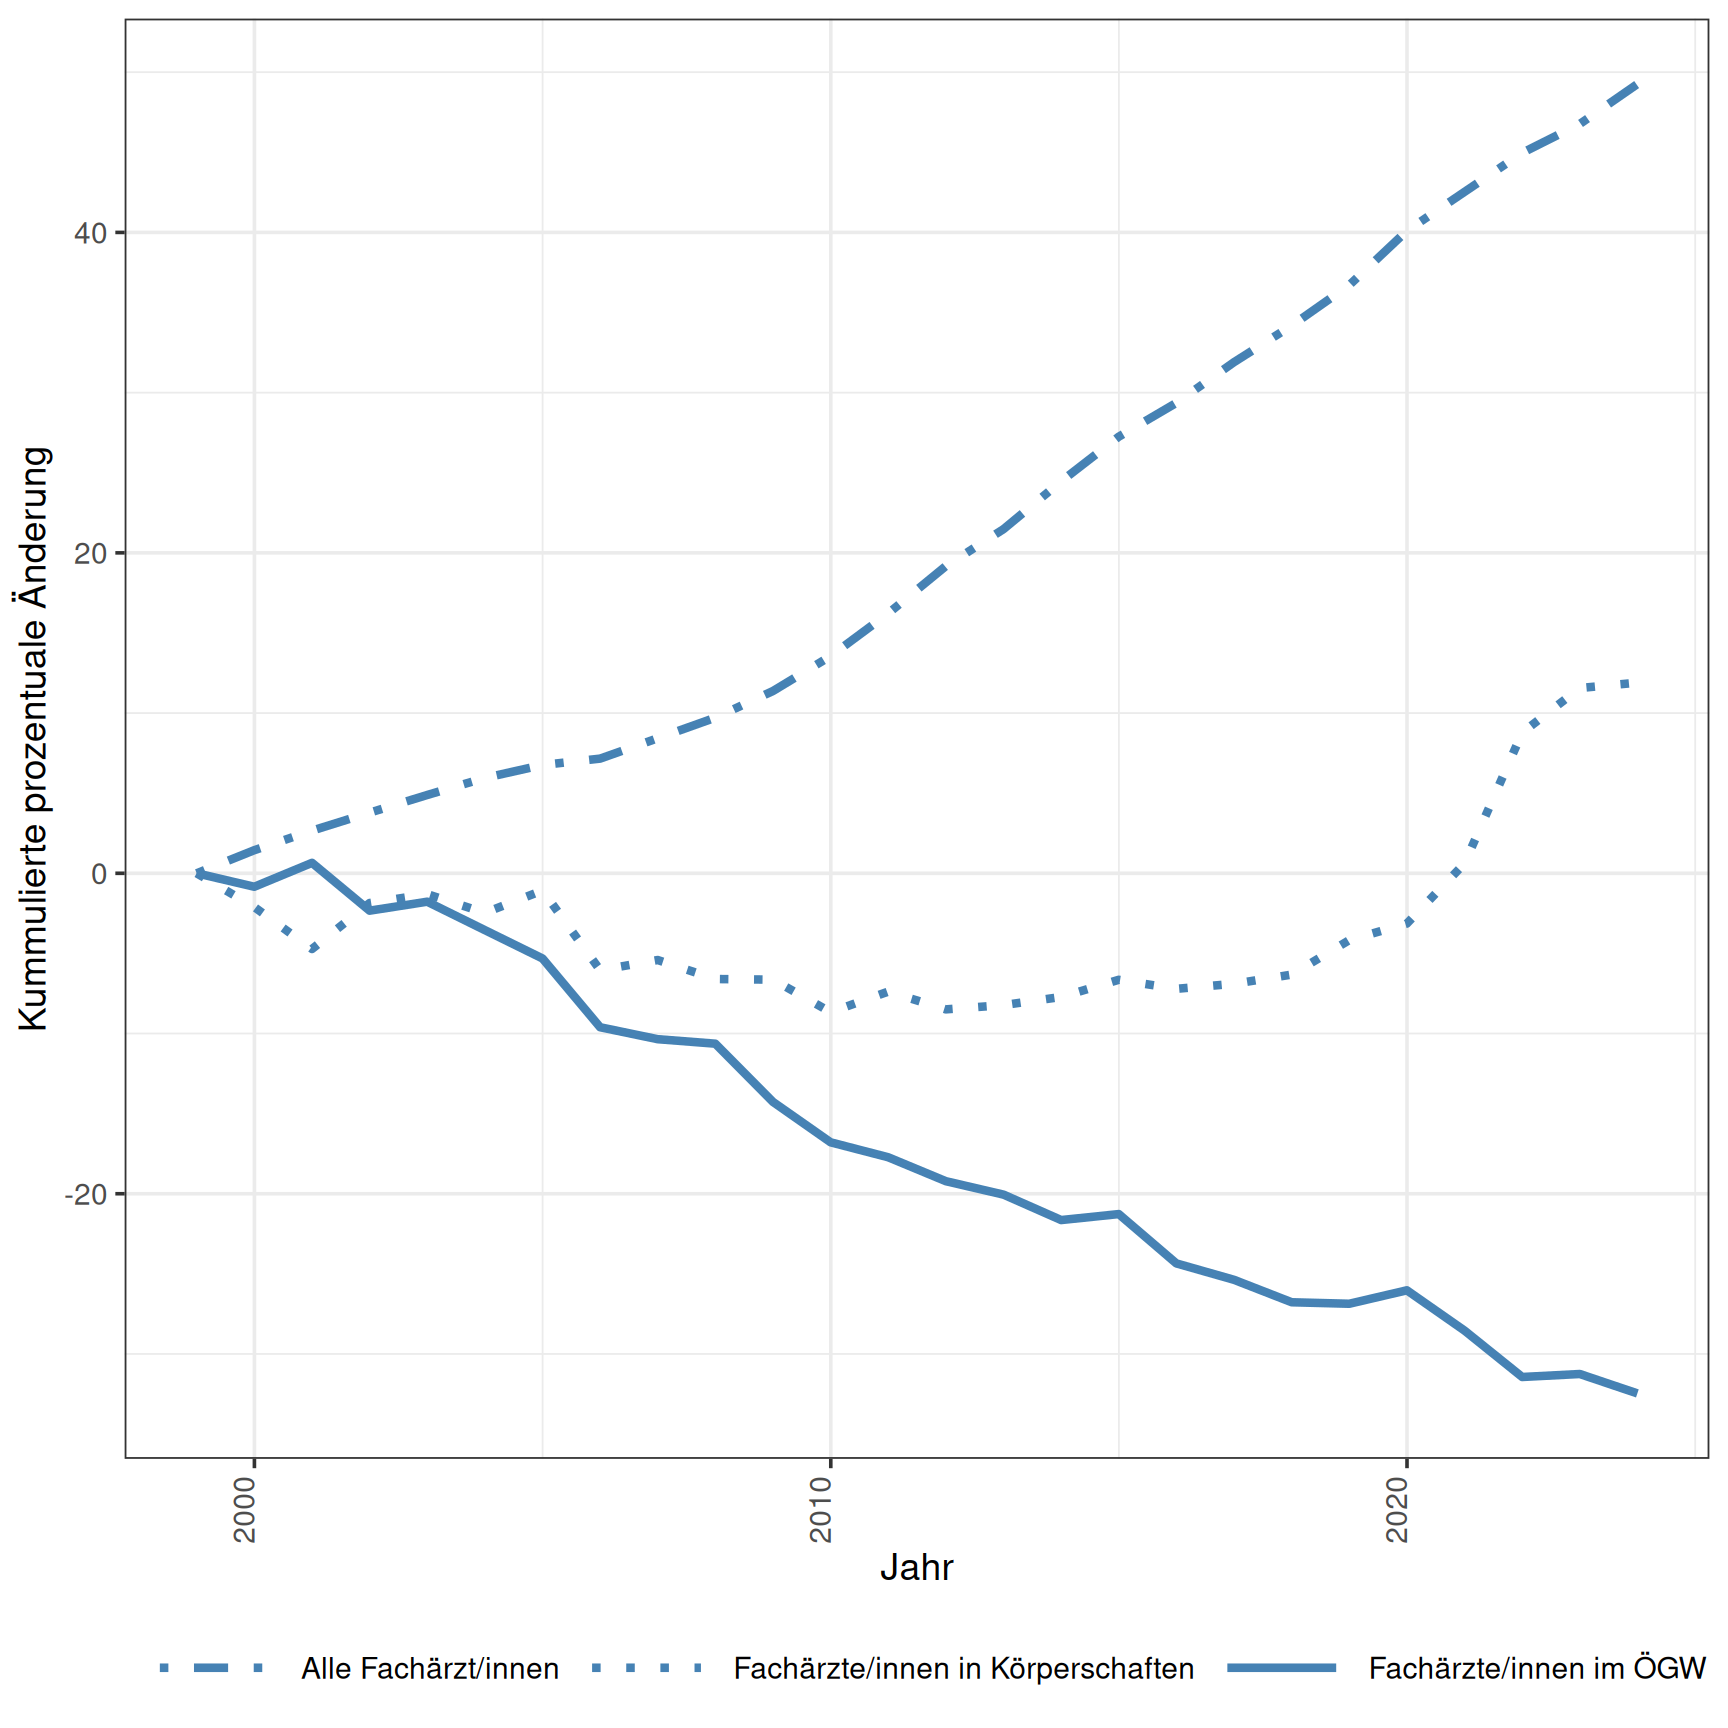

In [ ]:
gesamttaetige <- datensatz_taetigkeit_facharzt |> 
  # Filter nur die Zeilen für Alle nehmen sonst werden die Personen doppelt gezählt
  dplyr::filter(Facharzt == "Gebiets-/Facharztbezeichnungen insgesamt (inkl. ohne Gebiet)") |> 
  # Nur die wirklich tätigen nehmen (und z.B. nicht die Rentner)
  dplyr::filter(Taetigkeit == "Mit ärztlicher Tätigkeit") |> 
  group_by(Jahr) |> 
  summarise(n = sum(n)) |> 
  mutate(aerztliche_taetigkeit = "Gesamt")
  
behoerdlichetaetige <- datensatz_taetigkeit_facharzt |> 
  # Filter nur die Zeilen für Alle nehmen sonst werden die Personen doppelt gezählt
  dplyr::filter(Facharzt == "Gebiets-/Facharztbezeichnungen insgesamt (inkl. ohne Gebiet)") |> 
  # Filterung für Behörden. Es muss nicht nach "mit ärztlicher Tätigkeit gefilter werden - das ist bei Behörden schon enthalten
  filter(Taetigkeit == "In Behörden/Körperschaften u. a.") |> 
  group_by(Jahr) |> 
  summarise(n = sum(n)) |> 
  mutate(aerztliche_taetigkeit = "In Behörden/Körperschaften u. a.")

oegwtaetige <- datensatz_taetigkeit_facharzt |> 
  filter(Taetigkeit == "Mit ärztlicher Tätigkeit") |> 
  filter(Facharzt == "Öffentliches Gesundheitswesen") |> 
  group_by(Jahr) |> 
  summarise(n = sum(n)) |> 
  mutate(aerztliche_taetigkeit = "Öffentliches Gesundheitswesen")


p1 <- rbind(oegwtaetige, behoerdlichetaetige, gesamttaetige) |> 
  arrange(aerztliche_taetigkeit, Jahr) |> 
  group_by(aerztliche_taetigkeit) |> 
  mutate(change = n - lag(n)) |> 
  mutate(change = replace_na(change, 0)) |> 
  mutate(cum_change = cumsum(change)) |>  
  mutate(origin = n - cum_change) |> 
  mutate(cum_perc_change = (100 * (n - origin)) / origin) |> 
  ggplot(aes(Jahr, cum_perc_change, group = aerztliche_taetigkeit)) +
  geom_line(color='steelblue',aes(linetype = aerztliche_taetigkeit), linewidth = 1.5) +
  theme_bw(base_size = 14) +
  ylab("Kummulierte prozentuale Änderung") +
  theme(axis.text.x  = element_text(angle = 90, vjust = 0)) +
  labs(linetype = "", color = "Ärztliche Tätigkeit") +
  scale_linetype_manual(values = c("dotdash", "dotted", "solid"), breaks = c("Gesamt", "In Behörden/Körperschaften u. a.", "Öffentliches Gesundheitswesen"), labels = c("Alle Fachärzt/innen", "Fachärzte/innen in Körperschaften", "Fachärzte/innen im ÖGW")) +
  theme(legend.position = "bottom", legend.key.width = unit(1.8,"cm")) +
  guides(linetype = guide_legend(override.aes = list(size = 2))) 
      

ggsave(p1, filename = paste0("graphs/", Sys.Date(), "_Abbildung_1.jpg"), device = "jpg", width = 28, height = 14, units = "cm", dpi = 300)

p1

### Anteil der Fachärzt/innen ÖGW

In [ ]:
kable(
  
rbind(oegwtaetige, behoerdlichetaetige, gesamttaetige) %>% 
  mutate(Jahr = paste0("Jahr", strftime(Jahr, format = "%Y"))) %>% 
  filter(Jahr == max(Jahr)) |> 
  select("Tätigkeit" = aerztliche_taetigkeit, "Anzahl im Jahr 2023" = n)
  
)

## Nach Region

Bei den Ärztekammern registrierte tätigen Fachärt/innen für Öffentliches Gesundheitswesen nach Region von 1998 bis 2023 in Deutschland

### Abbildung

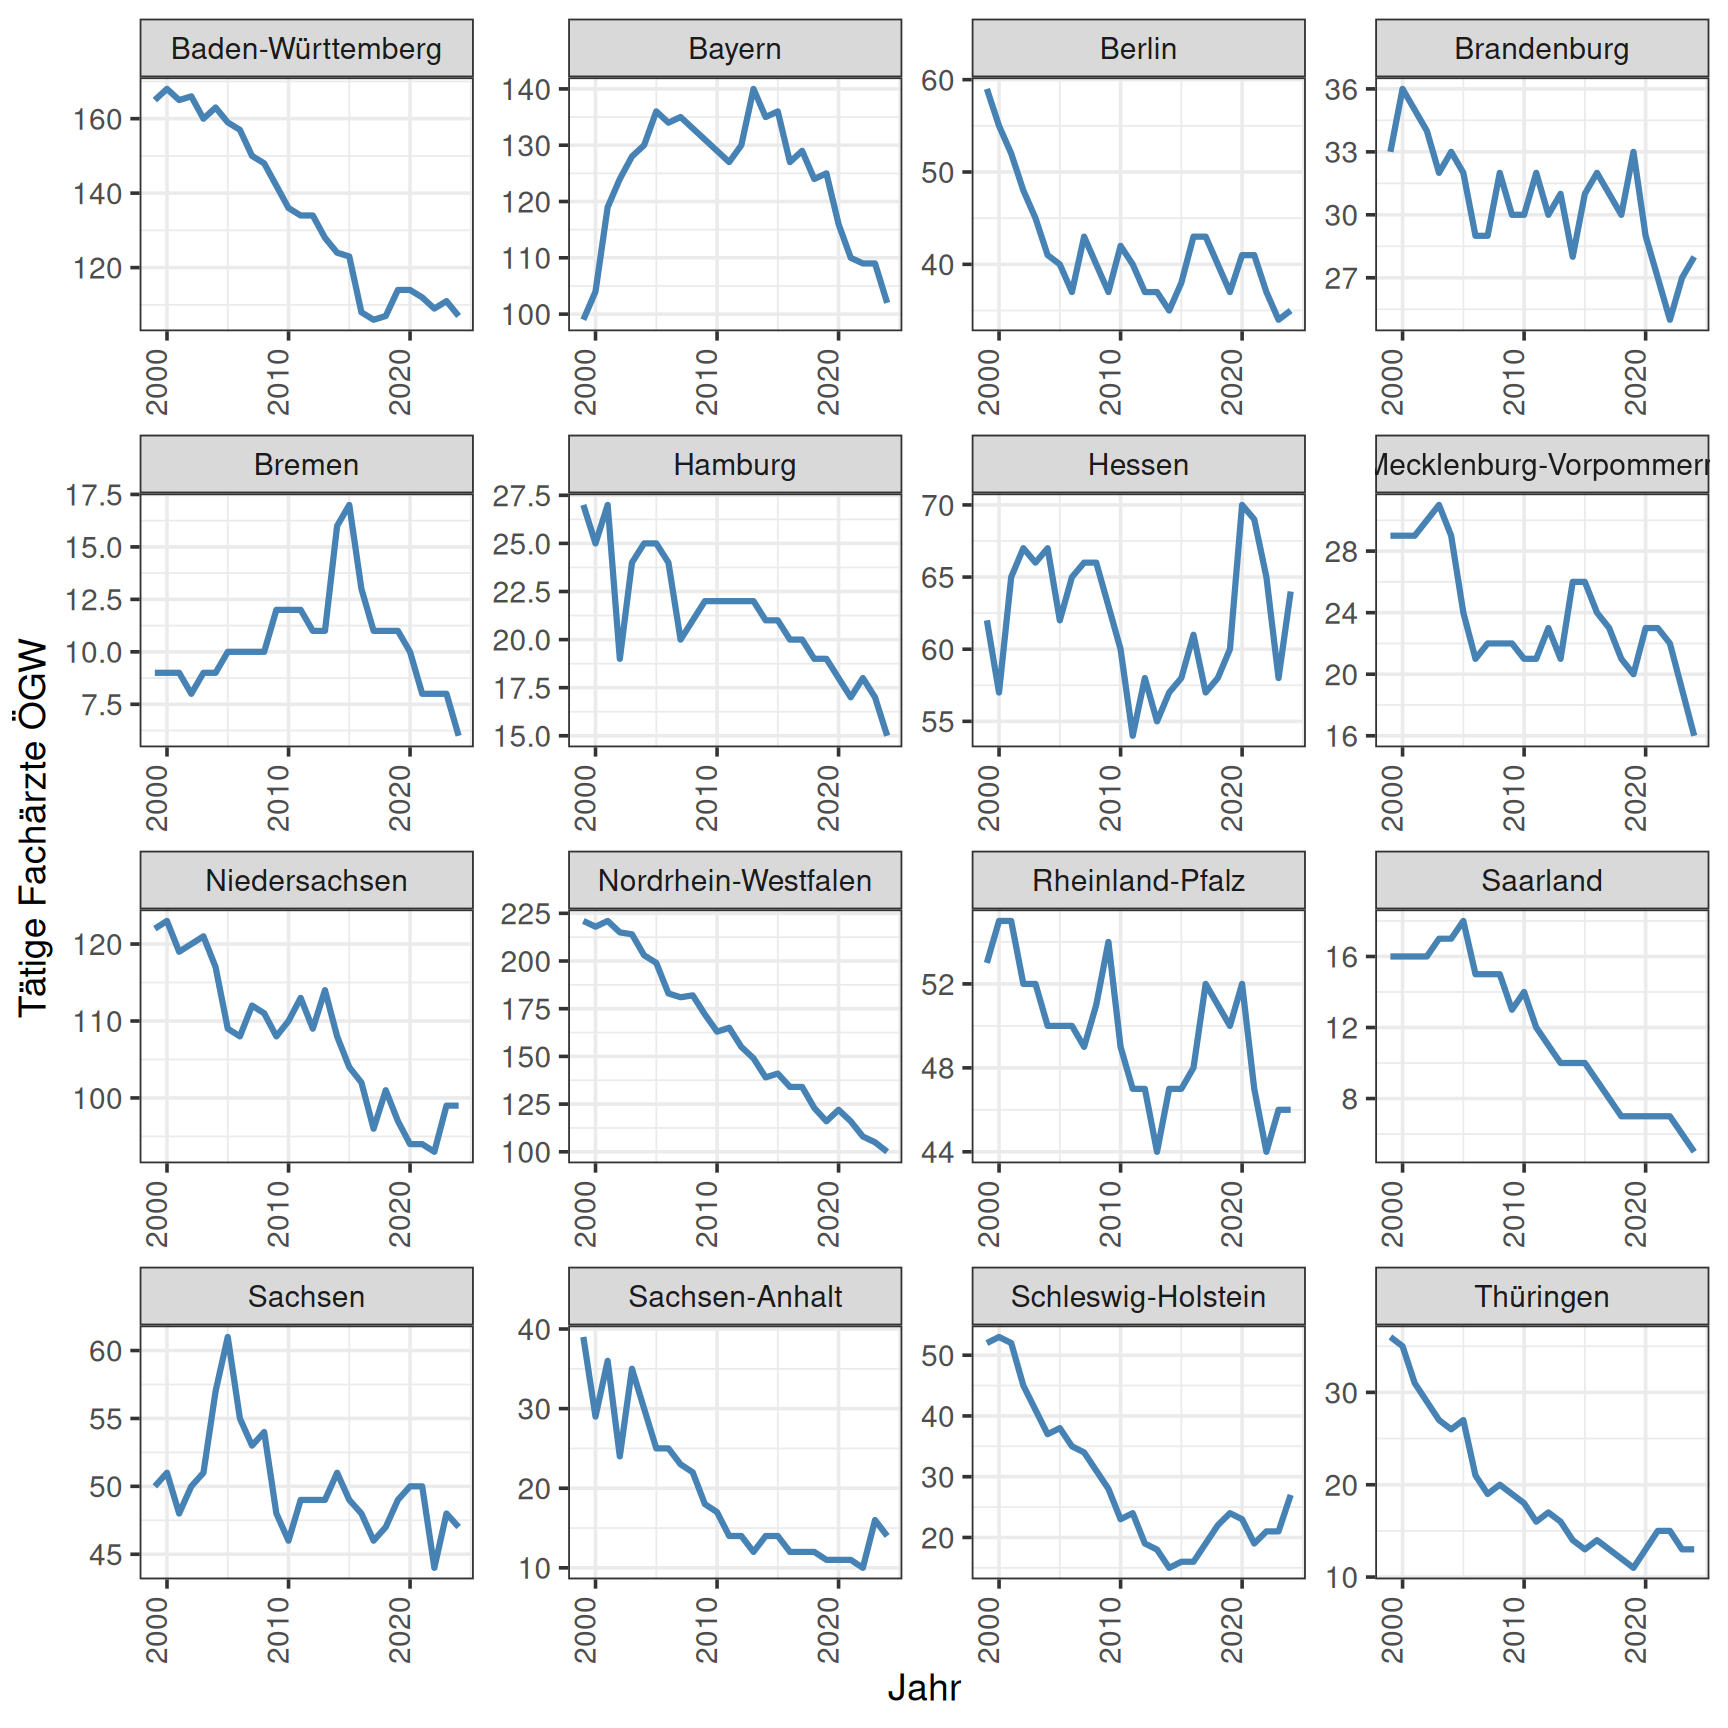

In [ ]:
g1 <- datensatz_region_facharzt_nuroegw |> 
  filter(Darstellung == "Anzahl Ärzte/Ärztinnen") |> 
  ggplot() +
  aes(x = Jahr, y = n, group = 1) +
  geom_line(color='steelblue',linewidth = 1.1) +
  facet_wrap(. ~ Region, scales = "free") +
  theme_bw(base_size = 14) +
  ylab("Tätige Fachärzte ÖGW") +
  theme(axis.text.x  = element_text(angle = 90, vjust = 0)) 

ggsave(g1, filename = paste0("graphs/", Sys.Date(),"_Abbildung_2"), device = "jpg", width = 28, height = 28, units = "cm", dpi = 300)

g1

### Tabelle

``` r
kable(
  
  datensatz_region_facharzt_nuroegw |> 
      filter(Darstellung == "Anzahl Ärzte/Ärztinnen") |> 
        spread(key = "Jahr", value = "n")  %>% 
        mutate(percentageChange = round(((`2023-12-31` * 100)/ `1998-12-31`) - 100,1)) %>% 
        select(Region, `1998-12-31`, `2023-12-31`, percentageChange) %>% 
        arrange(percentageChange) %>% 
        rename(`Verlust in Prozent` = percentageChange) 
  )
```

| Region                 | 1998-12-31 | 2023-12-31 | Verlust in Prozent |
|:-----------------------|-----------:|-----------:|-------------------:|
| Saarland               |         16 |          5 |              -68.8 |
| Sachsen-Anhalt         |         39 |         14 |              -64.1 |
| Thüringen              |         36 |         13 |              -63.9 |
| Nordrhein-Westfalen    |        221 |        100 |              -54.8 |
| Schleswig-Holstein     |         52 |         27 |              -48.1 |
| Mecklenburg-Vorpommern |         29 |         16 |              -44.8 |
| Hamburg                |         27 |         15 |              -44.4 |
| Berlin                 |         59 |         35 |              -40.7 |
| Baden-Württemberg      |        165 |        107 |              -35.2 |
| Bremen                 |          9 |          6 |              -33.3 |
| Niedersachsen          |        122 |         99 |              -18.9 |
| Brandenburg            |         33 |         28 |              -15.2 |
| Rheinland-Pfalz        |         53 |         46 |              -13.2 |
| Sachsen                |         50 |         47 |               -6.0 |
| Bayern                 |         99 |        102 |                3.0 |
| Hessen                 |         62 |         64 |                3.2 |

### Tabelle Anzahl pro 100.000

``` r
kable(
  datensatz_region_facharzt_nuroegw |> 
     filter(Darstellung == "Ärzte/Ärztinnen je 100.000 Einwohner") |> 
        filter(Jahr == "2023-12-31") %>% 
        select(Region, n) %>%
        arrange(n) |> 
        rename("Anzahl pro 100.000 (2023)" = n) 
)
```

| Region                 | Anzahl pro 100.000 (2023) |
|:-----------------------|--------------------------:|
| Saarland               |                      0.50 |
| Nordrhein-Westfalen    |                      0.55 |
| Thüringen              |                      0.61 |
| Sachsen-Anhalt         |                      0.64 |
| Bayern                 |                      0.76 |
| Hamburg                |                      0.79 |
| Bremen                 |                      0.87 |
| Schleswig-Holstein     |                      0.91 |
| Berlin                 |                      0.93 |
| Baden-Württemberg      |                      0.94 |
| Mecklenburg-Vorpommern |                      0.98 |
| Hessen                 |                      1.00 |
| Brandenburg            |                      1.08 |
| Rheinland-Pfalz        |                      1.10 |
| Sachsen                |                      1.15 |
| Niedersachsen          |                      1.21 |

## Nach Facharztrichtungen

Bei den Ärztekammern registrierte tätigen Ärztinnen und Ärzte für ausgewählte Facharztrichtungen in Deutschland zwischen 1998 und 2017

### Abbildung

ℹ Please use `linewidth` instead.

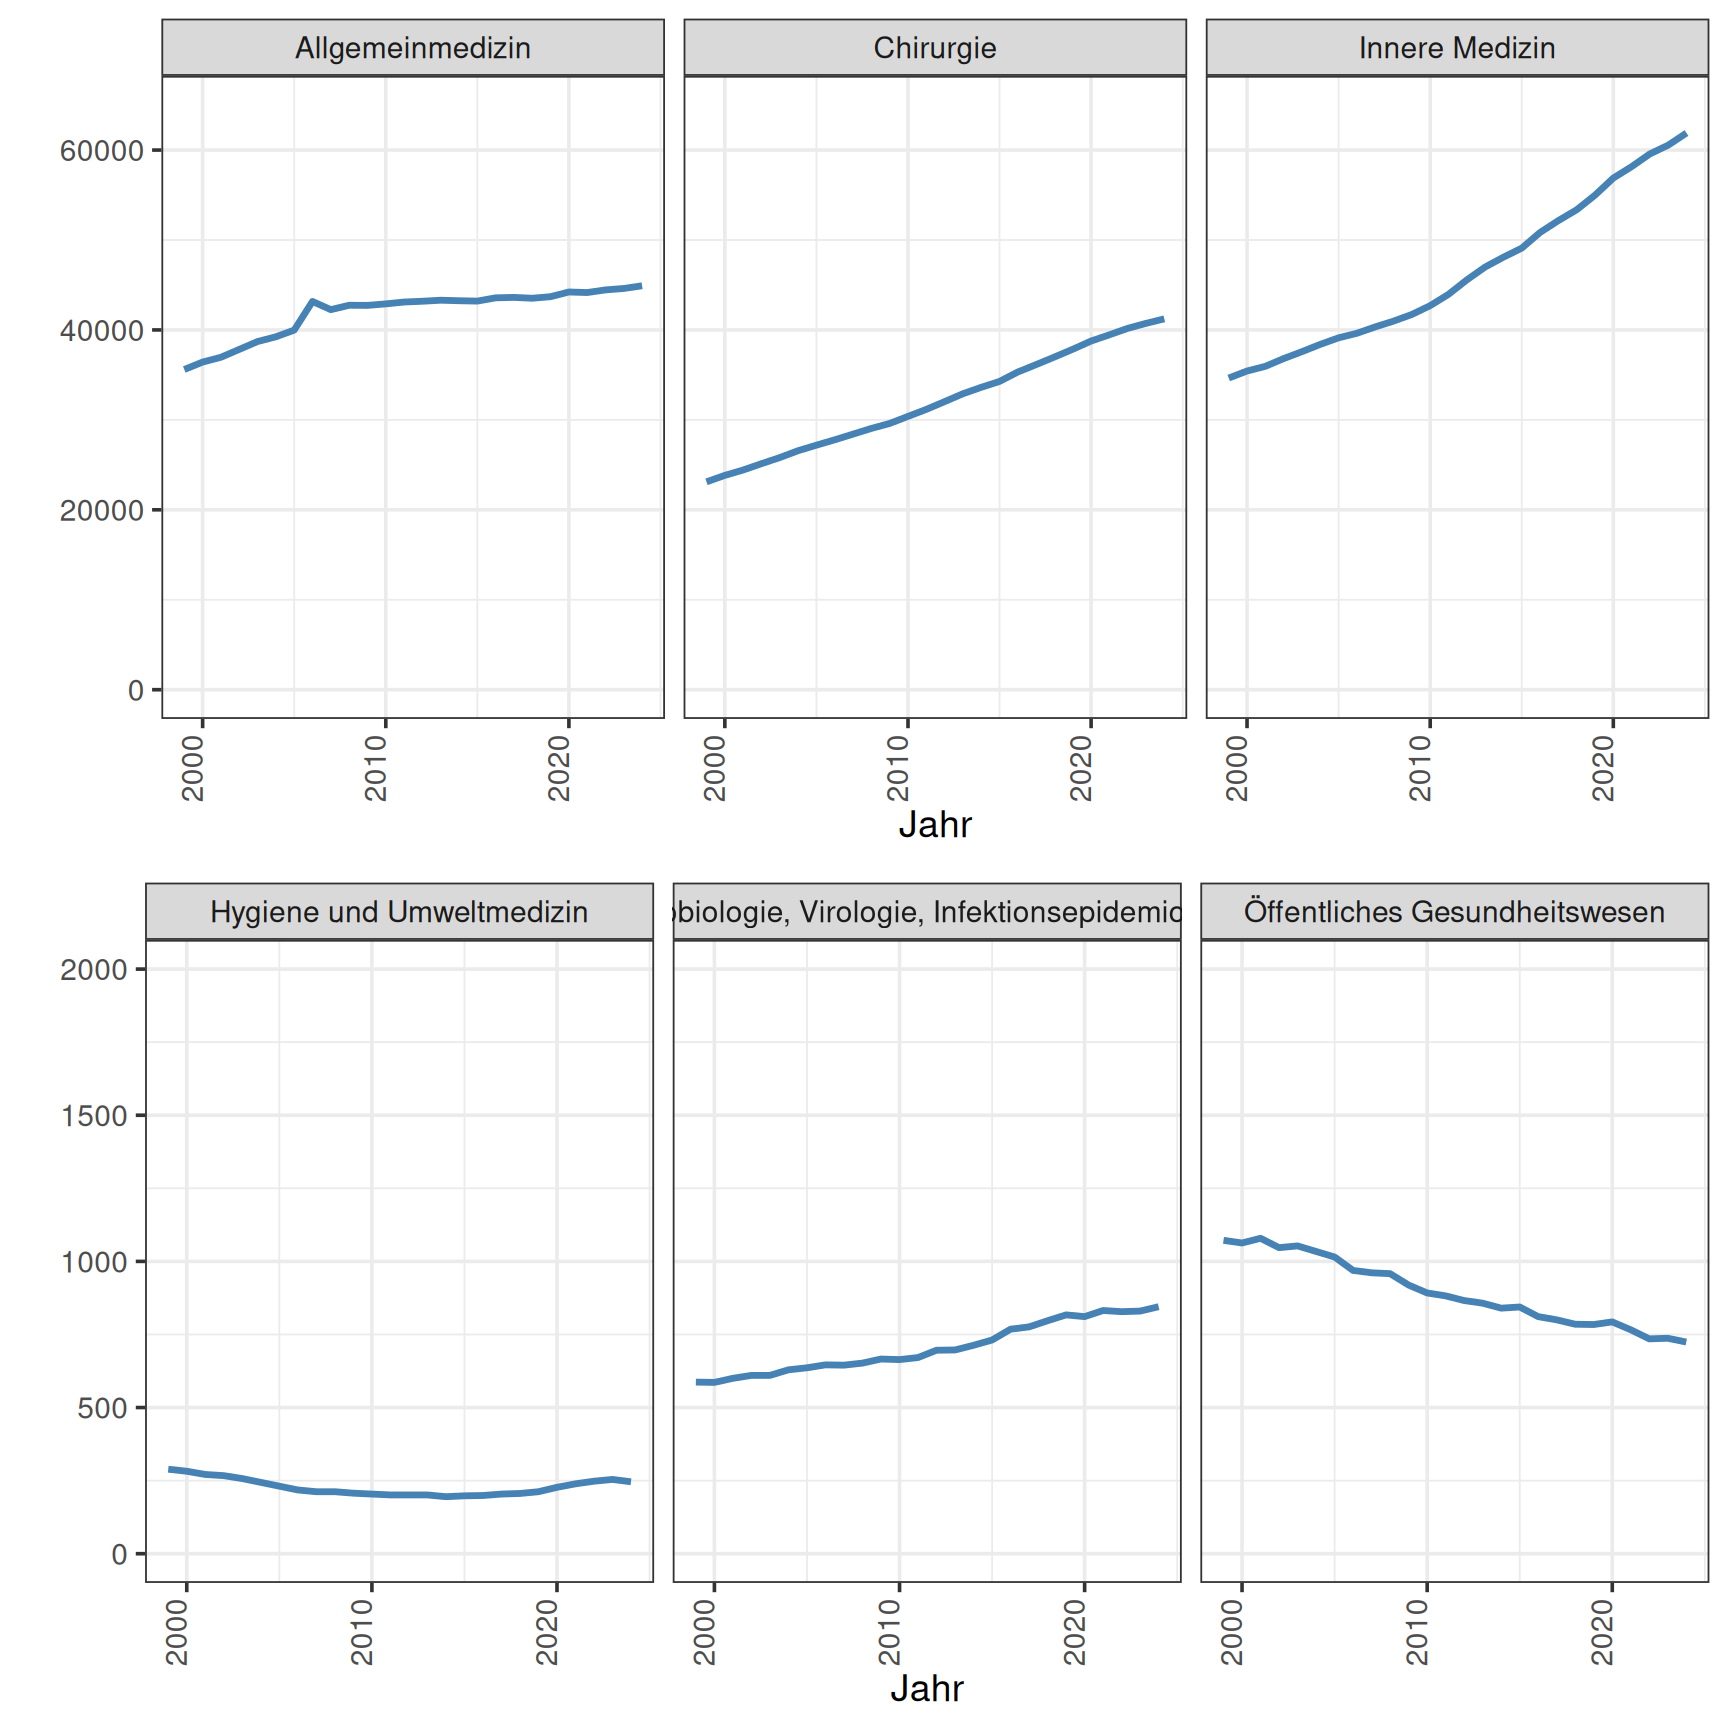

In [ ]:
g1 <- datensatz_taetigkeit_facharzt |> 
  filter(Taetigkeit == "Mit ärztlicher Tätigkeit") |> 
   filter(Facharzt %in% c("Innere Medizin", "Allgemeinmedizin",  "Chirurgie")) |> 
  ggplot() +
  aes(x = Jahr, y = n, group = 1) +
  geom_line(color='steelblue',size = 1.2) +
  facet_wrap(. ~ Facharzt) +
  theme_bw(base_size = 14) +
  ylab("") +
  theme(axis.text.x  = element_text(angle = 90, vjust = 0)) +
  scale_y_continuous(limits = c(0,65000)) 

### Tabelle

In [ ]:
kable(

datensatz_taetigkeit_facharzt |> 
  filter(Taetigkeit == "Mit ärztlicher Tätigkeit") |> 
  filter(Facharzt != "Sonstige Gebiete") |> 
  filter(Facharzt != "Ohne Gebiet") |> 
  filter(Facharzt != "Nervenheilkunde") |> 
  filter(Facharzt != "Gebiets-/Facharztbezeichnungen insgesamt (inkl. ohne Gebiet)") |> 
 arrange(Facharzt, Jahr) %>% 
  group_by(Facharzt) %>% 
  mutate(change = n - lag(n)) %>% 
  mutate(change = replace_na(change, 0)) %>% 
  mutate(cum_change = cumsum(change)) %>%  
  mutate(origin = n - cum_change) %>% 
  mutate(cum_perc_change = (100 * (n - origin)) / origin) %>% 
  mutate(cum_perc_change = round(cum_perc_change, 1)) %>% 
  mutate(Jahreszahl = strftime(Jahr, format = "%Y")) %>% 
  filter(Jahr == lubridate::ymd("2023-12-31")) %>% 
  arrange(cum_perc_change) %>% 
  select(Facharzt, 'Anzahl im Jahr 1998' = origin, 'Anzahl im Jahr 2023' = n, 'Kumulierte prozentuale Änderung' = cum_perc_change)
)

## Nach Alter

Bei den Ärztekammern registrierte tätige Ärztinnen und Ärzte mit der Facharztbezeichnung Öffentliches Gesundheitswesen nach Alter in Deutschland von 1998 bis 2023

### Abbildung über Zeit

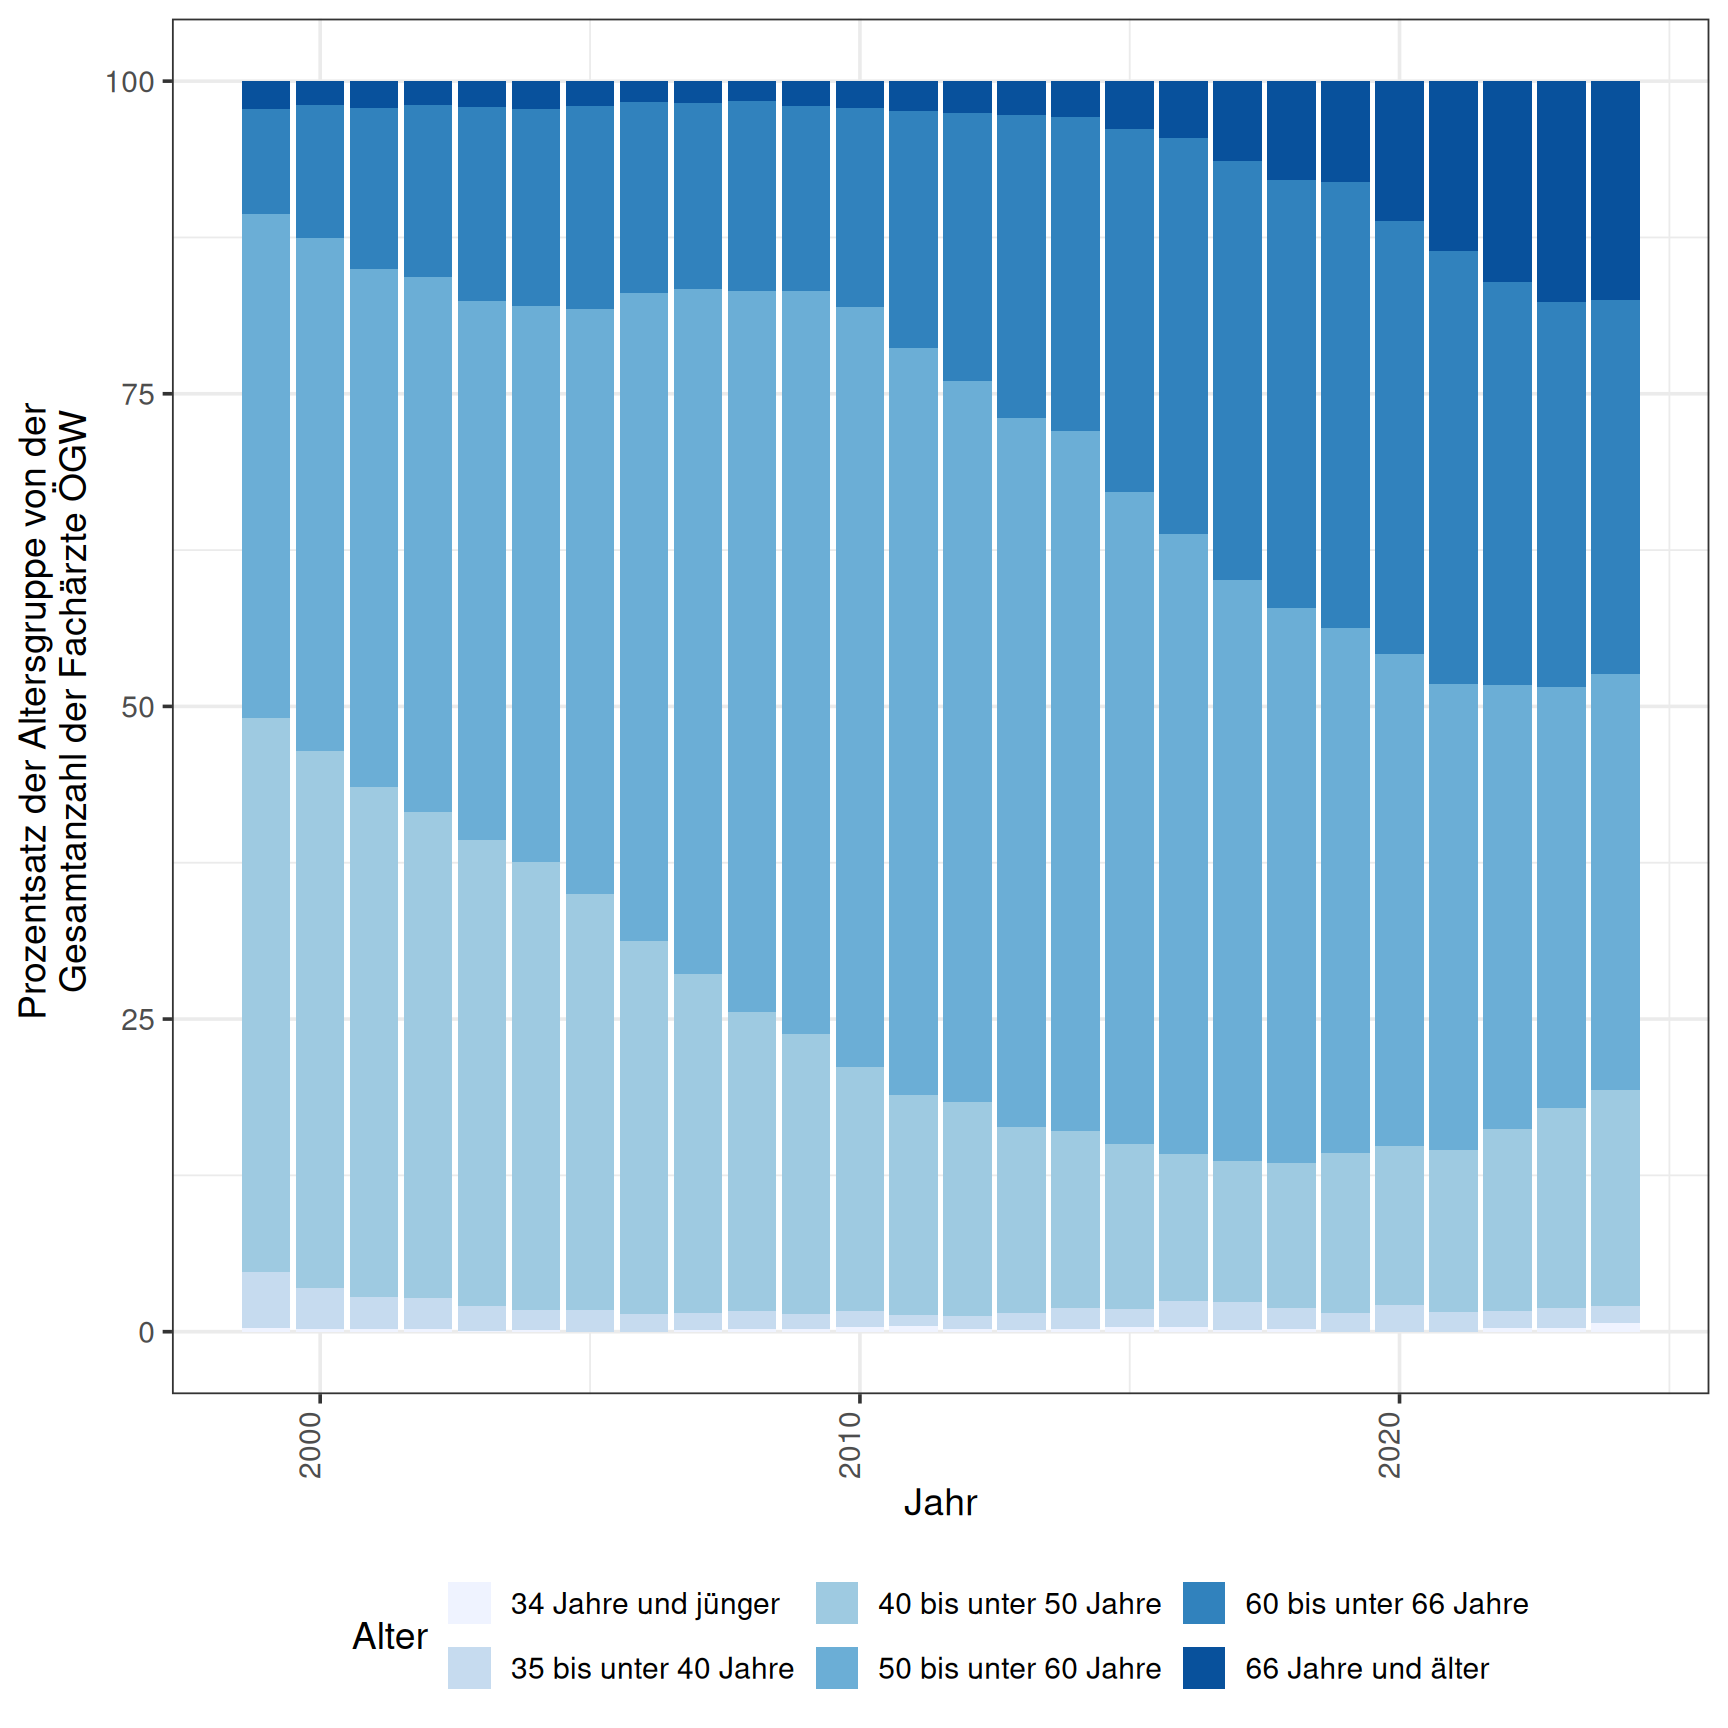

In [ ]:
g1 <- datensatz_geschlecht_alter |> 
  group_by(Jahr) |> 
  mutate(count = sum(n, na.rm = TRUE)) |>  
  mutate(percent = (n * 100) / count) |> 
  ggplot() +
  aes(x = Jahr, y = percent, fill = Alter) +
  geom_col(position = position_stack(reverse = TRUE)) +
  theme_bw(base_size = 14) +
  ylab("Prozentsatz der Altersgruppe von der \n Gesamtanzahl der Fachärzte ÖGW") +
  #scale_y_discrete(expand = c(0,0)) +
  theme(axis.text.x  = element_text(angle = 90, vjust = 0),
        legend.position = "bottom") +
  scale_fill_brewer(palette = "Blues")


ggsave(g1, filename = paste0("graphs/", Sys.Date(),"_Abbildung_4"), device = "jpg", width = 28, height = 28, units = "cm", dpi = 300)

g1

### Abbildung Jahresvergleich

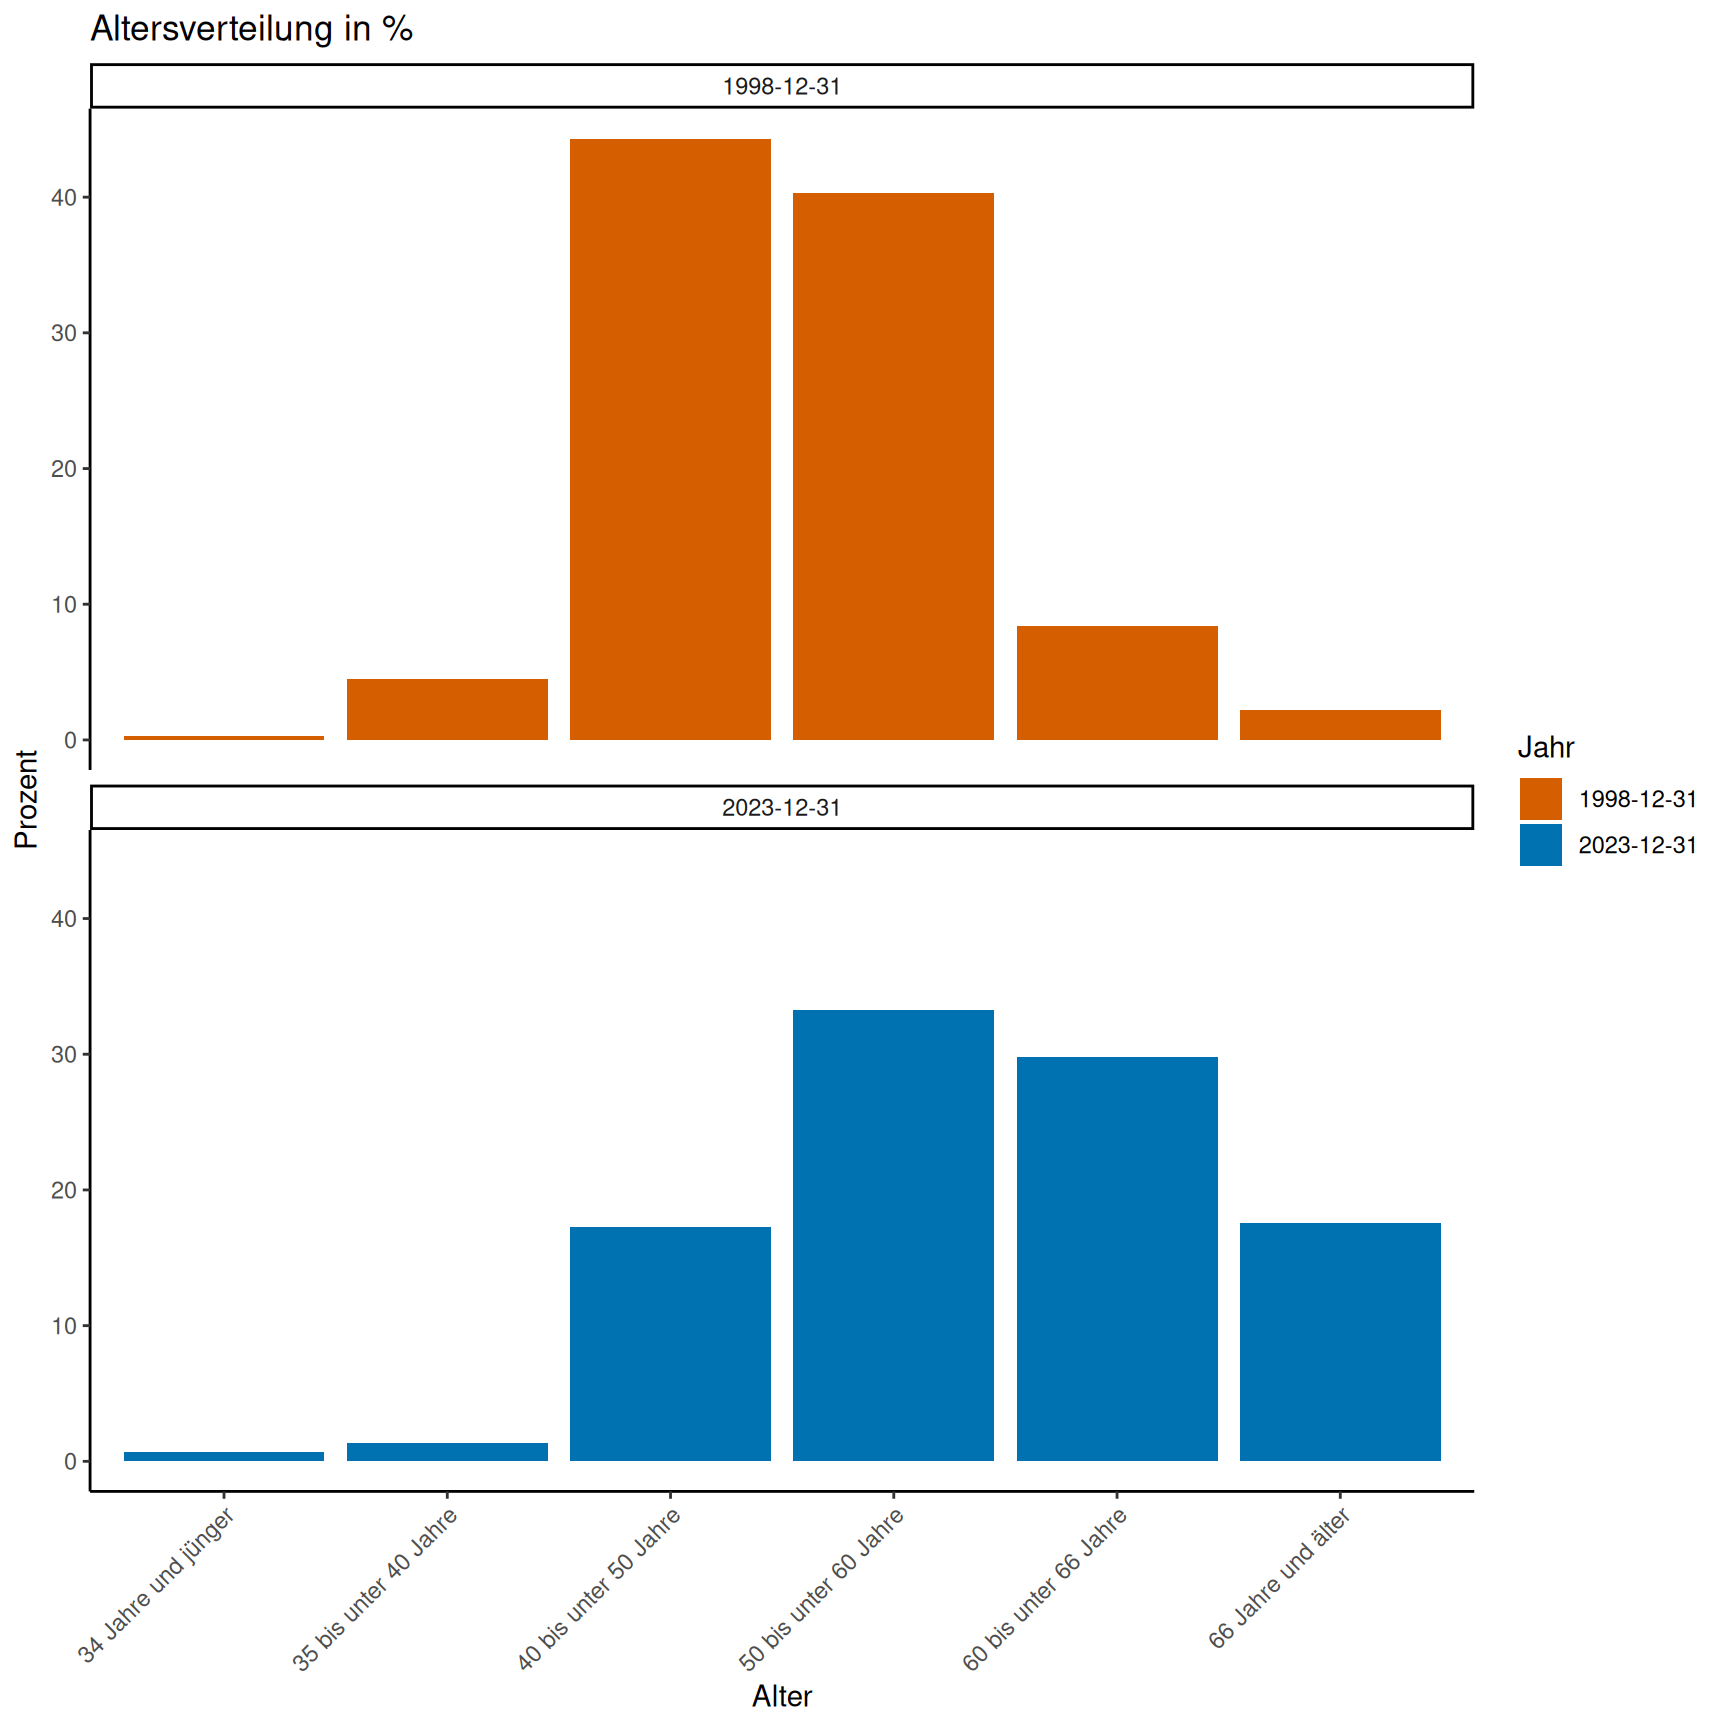

In [ ]:
df_percent <- datensatz_geschlecht_alter |> 
  filter(Jahr == "1998-12-31" | Jahr == "2023-12-31")  |> 
  group_by(Jahr, Alter) |> 
  summarise(n = sum(n), .groups = "drop")  |> 
  group_by(Jahr) |> 
  mutate(total_per_year = sum(n),
         percent = round(100 * n / total_per_year, 2)) %>%
  ungroup() |> 
  arrange(Jahr)


ggplot(df_percent, aes(x = Alter, y = percent, fill = as.factor(Jahr))) +
  geom_col() +
  facet_wrap(~ Jahr, ncol = 1) +  # one column, two rows
  scale_fill_manual(values = c("1998-12-31" = "#D55E00", "2023-12-31" = "#0072B2")) +
  labs(title = "Altersverteilung in %",
       x = "Alter",
       y = "Prozent",
       fill = "Jahr") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Tabelle

In [ ]:
kable(
  df_percent
)

## Nach Geschlecht

### Abbildung

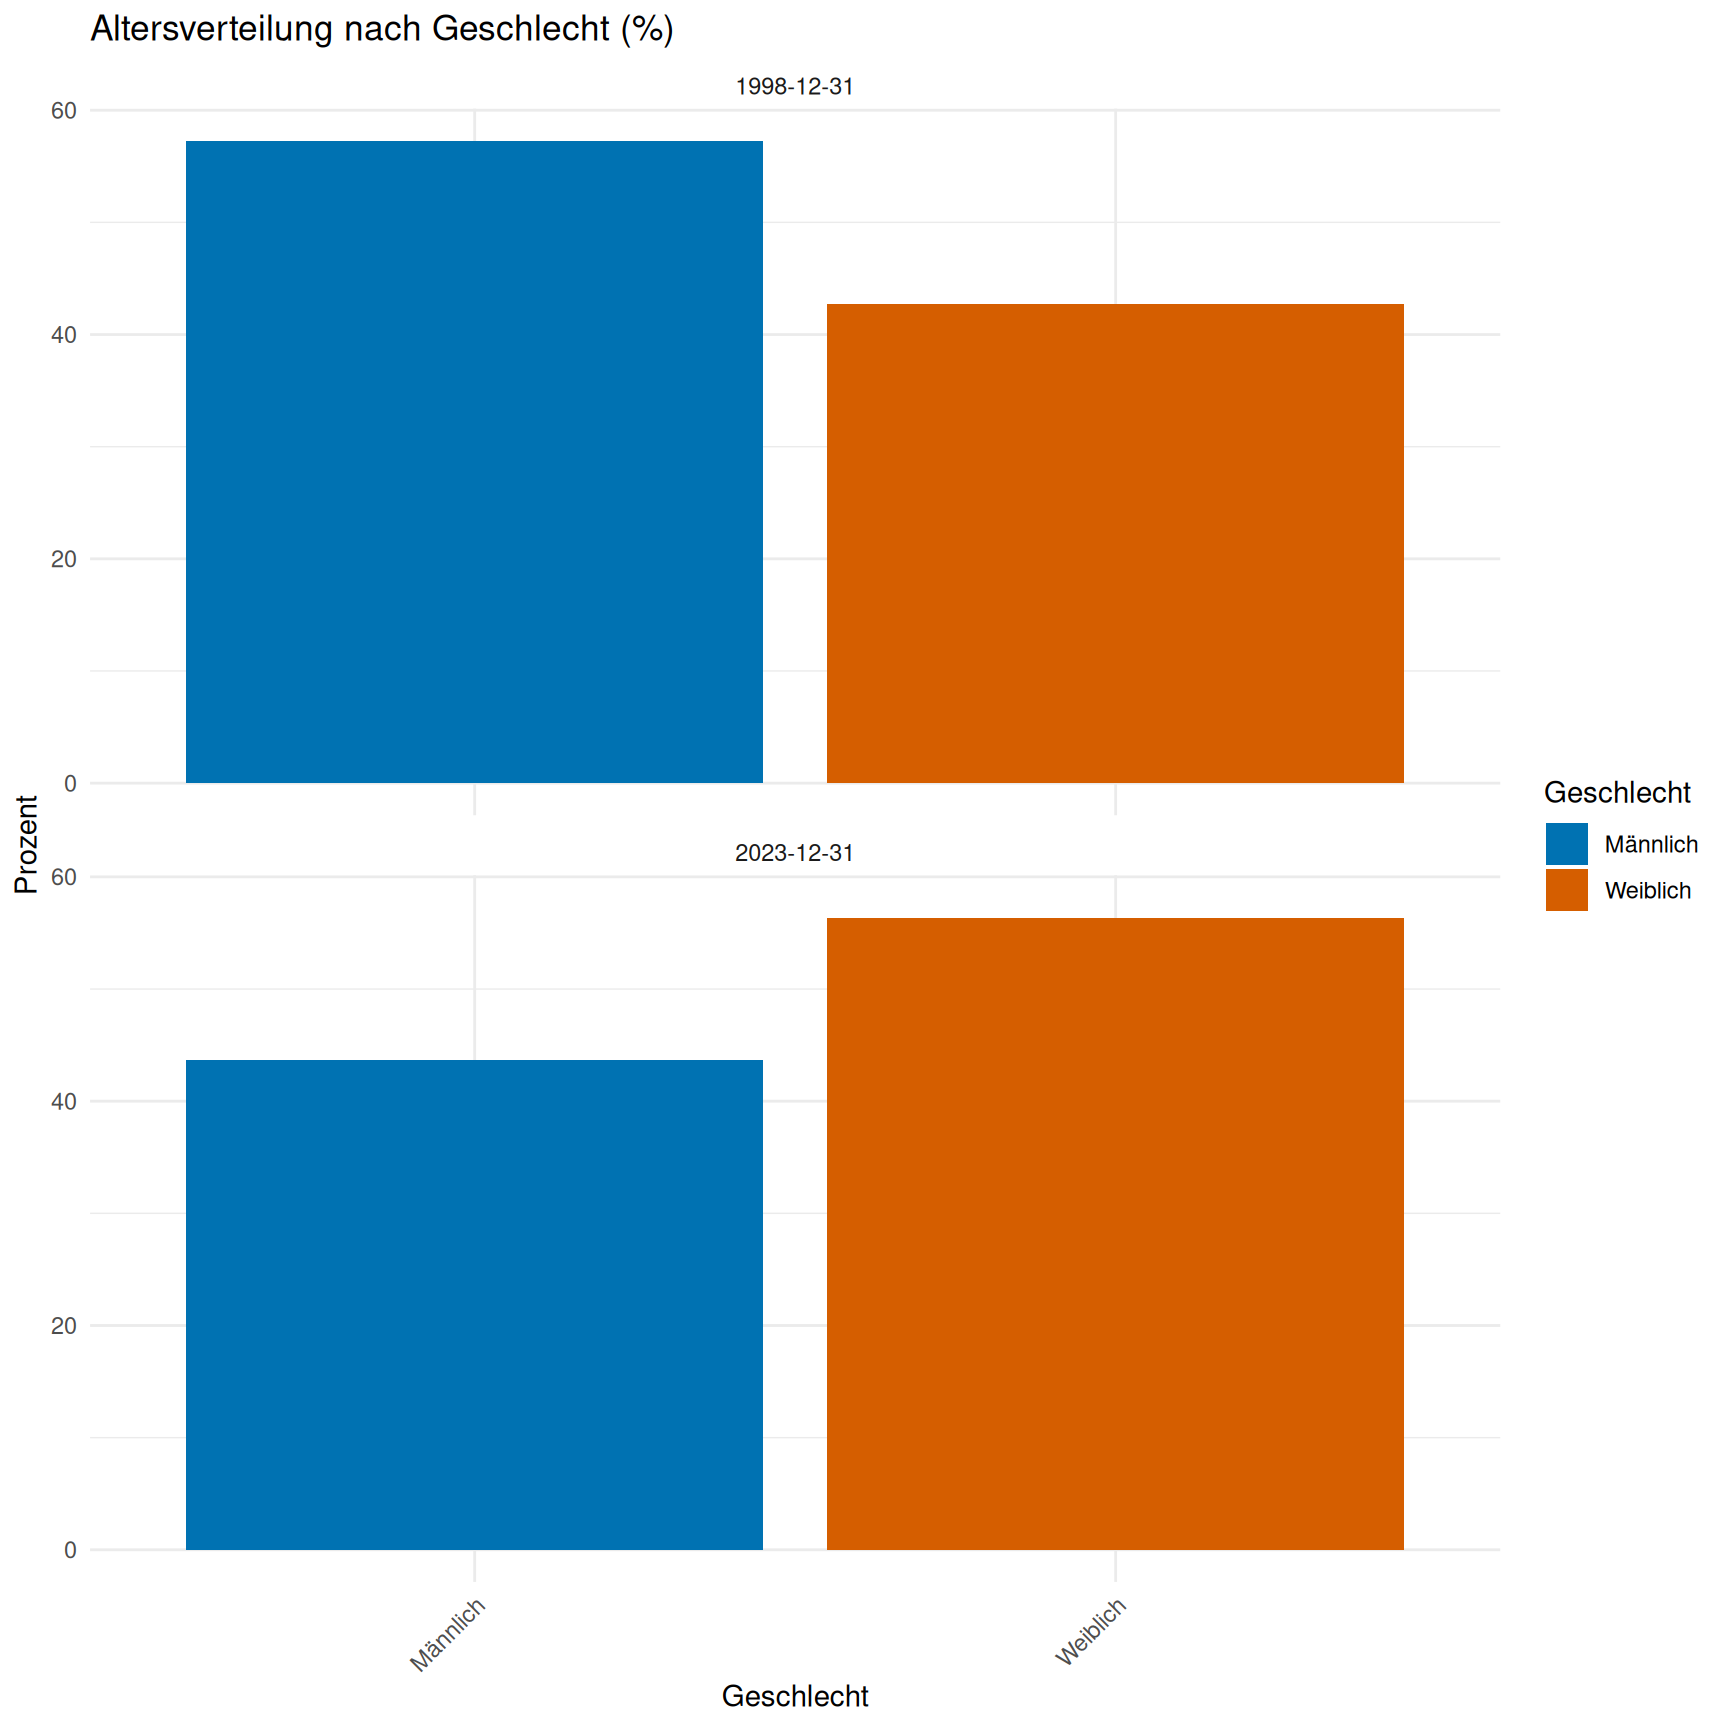

In [ ]:
df_sex_percent <- datensatz_geschlecht_alter %>%
  filter(Jahr %in% as.Date(c("1998-12-31", "2023-12-31"))) %>%
  group_by(Jahr, Geschlecht) %>%
  summarise(n = sum(n), .groups = "drop") %>%
  group_by(Jahr) %>%
  mutate(total_per_year = sum(n),
         percent = round(100 * n / total_per_year, 2)) %>%
  ungroup() |> 
  select(-total_per_year)



ggplot(df_sex_percent, aes(x = Geschlecht, y = percent, fill = Geschlecht)) +
  geom_col(position = "dodge") +
  facet_wrap(~ Jahr, ncol = 1) +  # one column: 1998 on top, 2023 below
  labs(title = "Altersverteilung nach Geschlecht (%)",
       x = "Geschlecht",
       y = "Prozent",
       fill = "Geschlecht") +
  theme_minimal() +
  scale_fill_manual(values = c("Männlich" = "#0072B2", "Weiblich" = "#D55E00")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Tabelle

In [ ]:
kable(df_sex_percent) 

## Alterspyramide

Bei den Ärztekammern registrierte tätige Ärztinnen und Ärzte mit der Facharztbezeichnung ÖGW nach Geschlecht und Alter (Alterspyramide) in Deutschland von 1998 bis 2023

`summarise()` has grouped output by 'Geschlecht', 'Alter'. You can override
using the `.groups` argument.

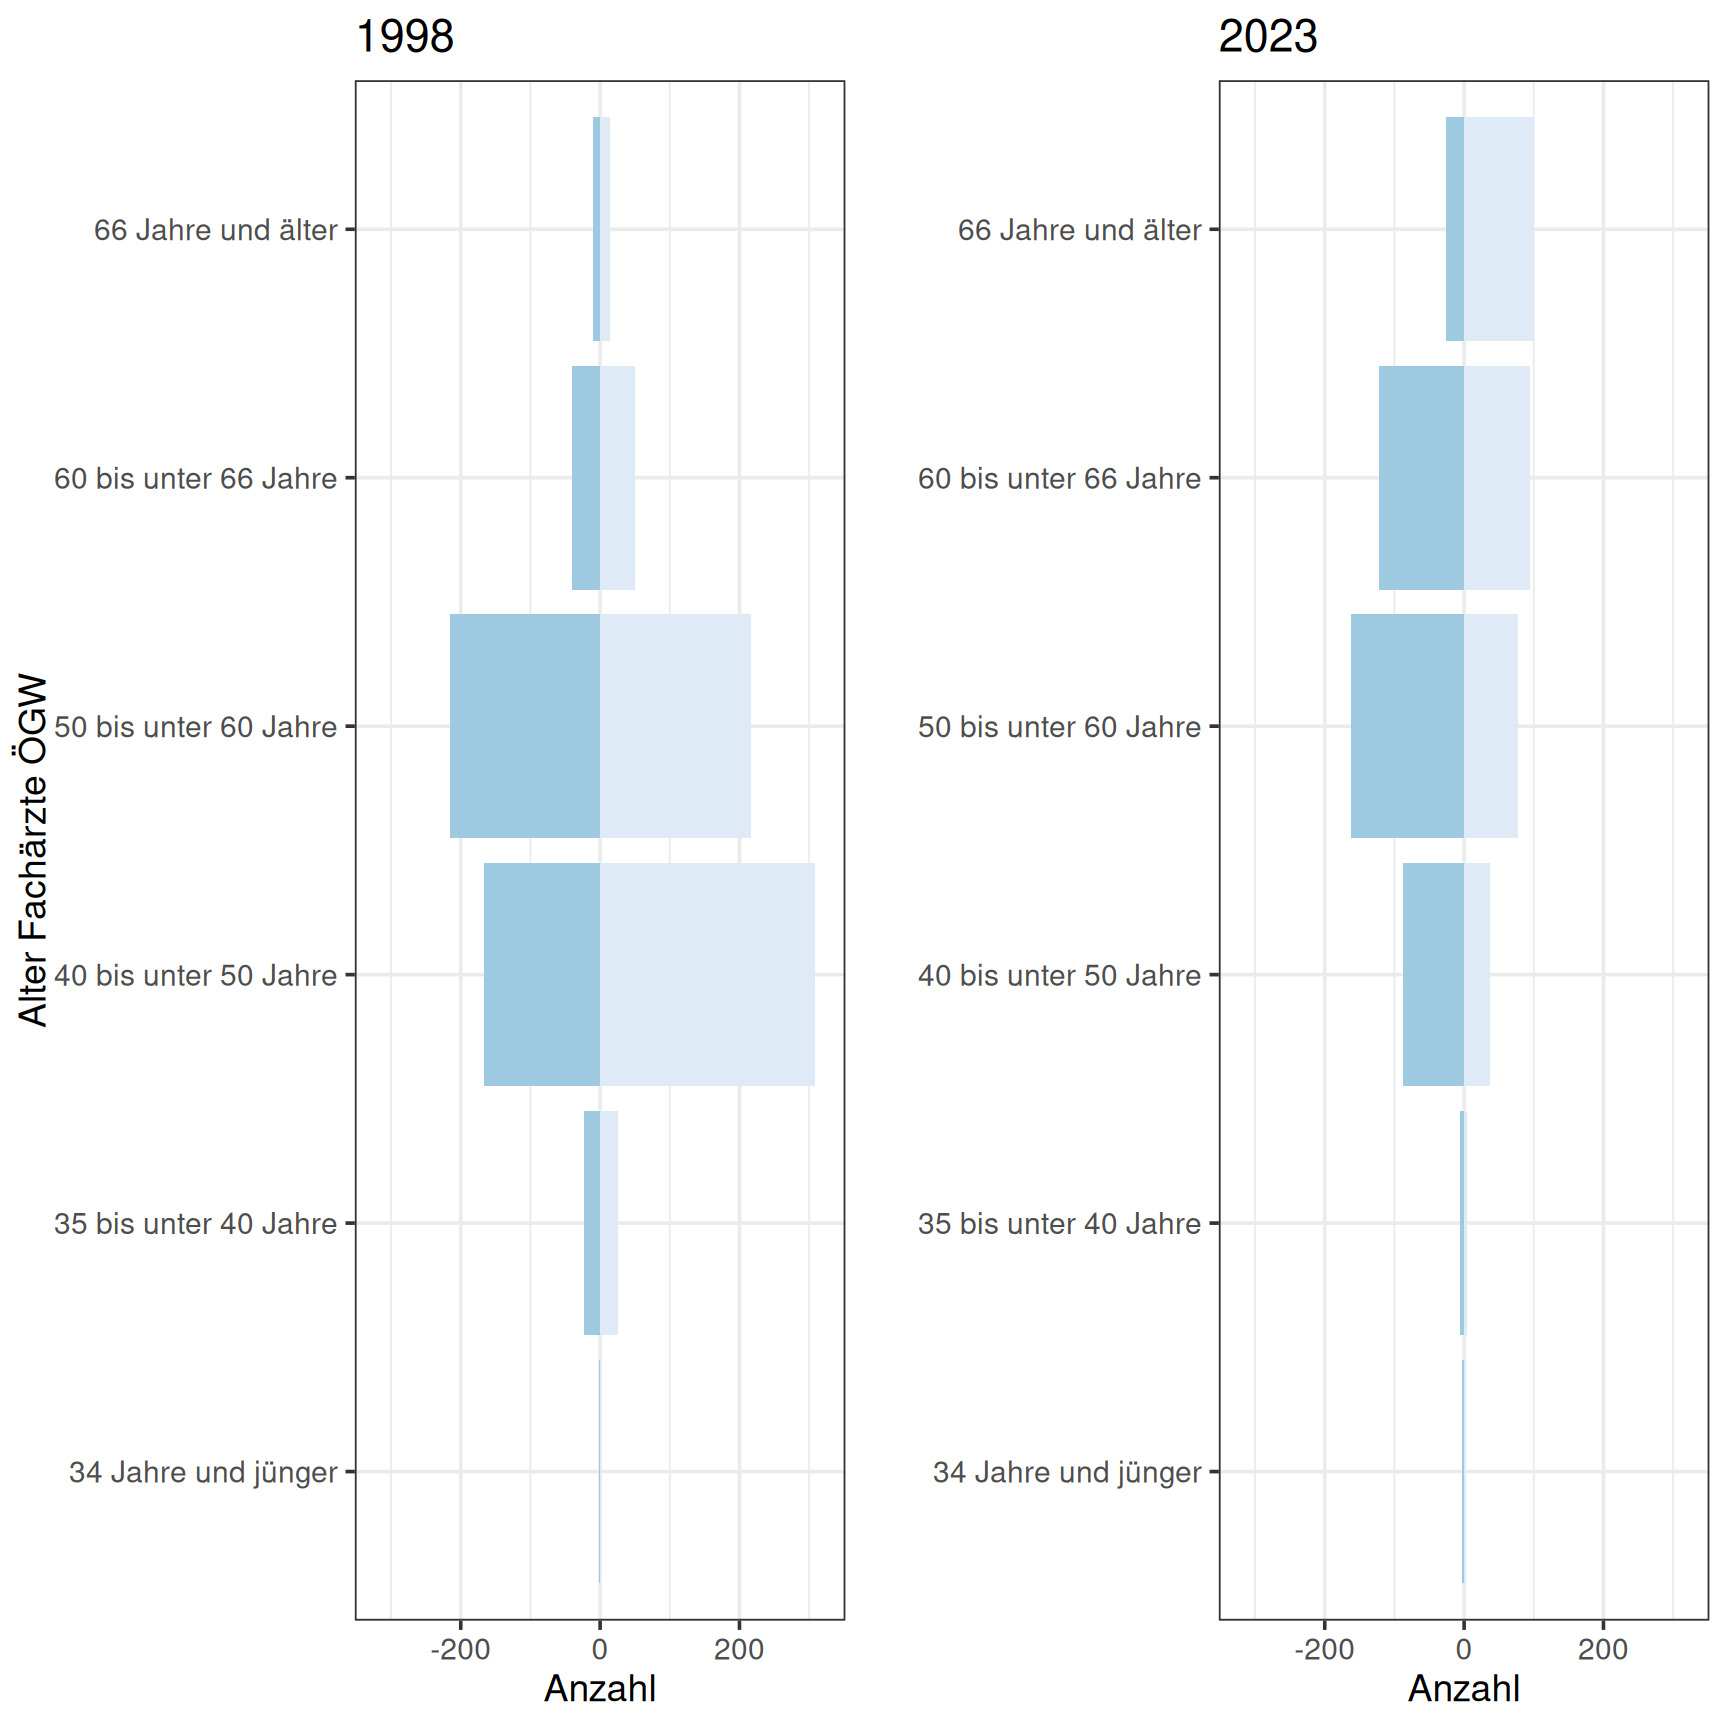

In [ ]:
data <- datensatz_geschlecht_alter |> 
  filter(Facharzt == "Öffentliches Gesundheitswesen") |> 
  group_by(Geschlecht, Alter, Jahr) |>  
  summarise(n = sum(n, na.rm = T))

# Diskussion

Die Ergebnisse unserer Untersuchung zeigen, dass die COVID-19-Pandemie den rückläufigen Trend bei der Anzahl der Fachärzte für Öffentliches Gesundheitswesen nicht aufhalten konnte. Trotz der erheblichen Aufmerksamkeit, die der Öffentliche Gesundheitsdienst während der Pandemie erhielt, und der damit einhergehenden gestiegenen gesellschaftlichen Anerkennung seiner Bedeutung, setzte sich der bereits von Tinnemann et al. (2021) dokumentierte Abwärtstrend fort. Dies ist besonders bemerkenswert, da die Pandemie die zentrale Rolle des ÖGD im Gesundheitssystem deutlich hervorgehoben hat.

Paradoxerweise berichten die Bundesländer gleichzeitig von einem Anstieg der Gesamtbeschäftigtenzahl in den lokalen Gesundheitsämtern. Diese Diskrepanz lässt sich vermutlich teilweise durch die Art der neu geschaffenen Stellen erklären. Im Rahmen des “Pakts für den Öffentlichen Gesundheitsdienst” wurden bis Ende 2022 bundesweit etwa XXXX Vollzeitäquivalente geschaffen. Vermutlich wurden diese Stellen überwiegend mit nicht-ärztlichem Personal besetzt, darunter Verwaltungskräfte, Hygienekontrolleure und Sozialarbeiter. Die Fachärzte für ÖGW konnte von dieser personellen Aufstockung bislang offenbar nicht profitieren.

Diese Entwicklung ist bedenklich, da gerade die fachärztliche Expertise für die Wahrnehmung hoheitlicher Aufgaben und die adäquate Versorgung vulnerabler Bevölkerungsgruppen unverzichtbar ist. Die anhaltende Überalterung der Fachärzteschaft für ÖGW, die bereits vor der Pandemie mit einem Anstieg des Anteils der über 50-Jährigen auf XXX dokumentiert wurde, verschärft diese Problematik zusätzlich und deutet auf einen drohenden weiteren Rückgang in den kommenden Jahren durch Pensionierungen hin.

Bei der Interpretation unserer Ergebnisse müssen einige Limitationen berücksichtigt werden. Insbesondere könnte der Zeitpunkt unserer Erhebung zu früh nach der akuten Pandemiephase liegen, um mögliche positive Effekte auf die Nachwuchsgewinnung vollständig abzubilden. Die Ausbildung zum Facharzt für Öffentliches Gesundheitswesen erfordert nach dem Medizinstudium eine mehrjährige Weiterbildung. Daher könnten sich eventuelle pandemiebeeinflusste Karriereentscheidungen junger Ärztinnen und Ärzte erst mit zeitlicher Verzögerung in den Statistiken niederschlagen. Eine Folgeerhebung in drei bis fünf Jahren könnte feststellen, ob die während der Pandemie gestiegene Aufmerksamkeit für Public Health langfristig zu einem verstärkten Interesse an der Facharztweiterbildung ÖGW geführt hat.

Die anhaltend geringe Anzahl an Fachärzten für ÖGW steht im Widerspruch zu den steigenden Anforderungen an den ÖGD und den Lehren aus der Pandemie. Während der “Pakt für den Öffentlichen Gesundheitsdienst” wichtige Verbesserungen eingeleitet hat, scheint die spezifische Förderung des fachärztlichen Nachwuchses bislang nicht ausreichend berücksichtigt worden zu sein. Die von der Studie aufgezeigte Diskrepanz zwischen allgemeiner Personalaufstockung und dem anhaltenden Mangel an Fachärzten für ÖGW unterstreicht die Notwendigkeit gezielter Maßnahmen zur Attraktivitätssteigerung dieser Fachdisziplin.